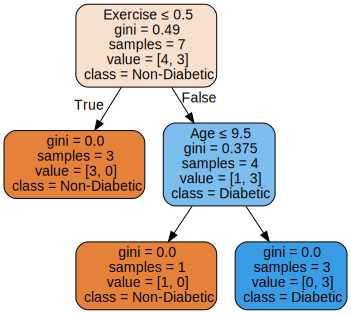

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.DataFrame({
    'Cholesterol': ['Y', 'Y', 'N', 'N', 'Y', 'Y', 'N'],
    'Exercise': ['Y', 'N', 'Y', 'Y', 'Y', 'N', 'N'],
    'Age': [7, 18, 12, 38, 35, 50, 83],
    'Diabetes': [0, 0, 1, 1, 1, 0, 0]
})


le_chol = LabelEncoder()
le_exer = LabelEncoder()
df['Cholesterol'] = le_chol.fit_transform(df['Cholesterol'])
df['Exercise'] = le_exer.fit_transform(df['Exercise'])


X = df.drop('Diabetes', axis=1)
y = df['Diabetes']


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)


from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns.tolist(),
                     class_names=['Non-Diabetic', 'Diabetic'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph